# 2. Preprocessing

### 1.1 Import

In [1]:
import time
tic = time.time()

import numpy as np
import pandas as pd
import gc
import os
import glob
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
warnings.simplefilter(action='ignore', category=FutureWarning)


separator_line = '\n\n'+'\033[1m_\033[0m'*100+'\n'+'\033[1m_\033[0m'*100+'\n\n'
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 4000)
pd.set_option('display.width', 1000)

### 1.2 Read CSV

In [2]:
# get csv's paths
for file_csv in glob.glob(r"C:\Users\emanu\Documents\Projet_7\input\*.csv"):
    file_csv = os.path.join("c:\\", file_csv)
    
    # from path extract the csv name
    start = r"C:\Users\emanu\Documents\Projet_7\input"
    end = '.csv'
    data_name = ((file_csv.split(start))[1].split(end)[0])[1:]
    
    # read csv
    data = pd.read_csv(file_csv, encoding="utf-8", encoding_errors='ignore')
    
    # take and save some info
    data_info = pd.DataFrame()
    data_info['Dtypes'] = data.dtypes
    data_info['Nan_values']= data.isna().mean()
    data_info['NUnique'] = data.nunique()
    
    # print
    print('\n\n\033[1m'+data_name+' :\033[0m ')    
    print(f'\n\nINFOS \n\nshape : {data.shape}')
    display(data_info)
    display(data.sample(5))
    print(separator_line)
    
del data_info, data, data_name
gc.collect()



application_test : 


INFOS 

shape : (48744, 121)


,Dtypes,Nan_values,NUnique
SK_ID_CURR,int64,0.000000,48744
NAME_CONTRACT_TYPE,object,0.000000,2
CODE_GENDER,object,0.000000,2
FLAG_OWN_CAR,object,0.000000,2
FLAG_OWN_REALTY,object,0.000000,2
CNT_CHILDREN,int64,0.000000,11
AMT_INCOME_TOTAL,float64,0.000000,606
AMT_CREDIT,float64,0.000000,2937
AMT_ANNUITY,float64,0.000492,7491
AMT_GOODS_PRICE,float64,0.000000,677


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
9461,168916,Cash loans,F,N,N,1,135000.0,234576.0,24759.0,202500.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.004960,-10691,-980,-4835.0,-2651,NaN,1,1,0,1,0,0,Accountants,3.0,2,2,MONDAY,9,0,0,0,0,1,1,Business Entity Type 2,0.250693,0.361476,0.746300,0.0082,NaN,0.9752,NaN,NaN,NaN,NaN,0.0417,NaN,NaN,NaN,0.0090,NaN,NaN,0.0084,NaN,0.9692,NaN,NaN,NaN,NaN,0.0417,NaN,NaN,NaN,0.0083,NaN,NaN,0.0083,NaN,0.9752,NaN,NaN,NaN,NaN,0.0417,NaN,NaN,NaN,0.0092,NaN,NaN,NaN,block of flats,0.0063,NaN,No,0.0,0.0,0.0,0.0,-454.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
28162,305460,Cash loans,M,N,Y,1,315000.0,675000.0,80239.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-15888,-148,-8214.0,-5981,NaN,1,1,0,1,0,0,Drivers,3.0,1,1,FRIDAY,9,0,0,0,0,0,0,Transport: type 4,0.251333,0.758163,0.427657,0.0412,NaN,0.9866,NaN,NaN,0.0,0.0690,0.1667,NaN,0.0639,NaN,NaN,NaN,NaN,0.0420,NaN,0.9866,NaN,NaN,0.0,0.0690,0.1667,NaN,0.0654,NaN,NaN,NaN,NaN,0.0416,NaN,0.9866,NaN,NaN,0.0,0.0690,0.1667,NaN,0.0650,NaN,NaN,NaN,NaN,NaN,block of flats,0.0381,Panel,No,0.0,0.0,0.0,0.0,-223.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
32669,337896,Cash loans,F,N,N,0,427500.0,450000.0,25128.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-17660,-162,-2164.0,-1208,NaN,1,1,1,1,0,0,Security staff,2.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.654624,0.614728,0.406617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,4.0,0.0,-502.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
29249,3



____________________________________________________________________________________________________
____________________________________________________________________________________________________




application_train : 


INFOS 

shape : (307511, 122)


,Dtypes,Nan_values,NUnique
SK_ID_CURR,int64,0.000000,307511
TARGET,int64,0.000000,2
NAME_CONTRACT_TYPE,object,0.000000,2
CODE_GENDER,object,0.000000,3
FLAG_OWN_CAR,object,0.000000,2
FLAG_OWN_REALTY,object,0.000000,2
CNT_CHILDREN,int64,0.000000,15
AMT_INCOME_TOTAL,float64,0.000000,2548
AMT_CREDIT,float64,0.000000,5603
AMT_ANNUITY,float64,0.000039,13672


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
87096,201086,0,Cash loans,F,N,Y,1,135000.0,942300.0,27549.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.030755,-15277,-135,-7058.0,-5053,NaN,1,1,0,1,0,0,Security staff,2.0,2,2,THURSDAY,10,0,0,0,0,1,1,Security,NaN,0.199041,0.477649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1905.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
173210,300724,0,Cash loans,F,N,Y,1,247500.0,1082214.0,31770.0,945000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.009175,-9400,-340,-1634.0,-1640,NaN,1,1,0,1,1,1,NaN,3.0,2,2,SATURDAY,12,0,0,0,0,1,1,Business Entity Type 3,NaN,0.497985,0.681706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-1291.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
114910,233243,1,Cash loans,F,N,N,1,121500.0,312768.0,15966.0,270000.0,Unaccompanied,Working,Lower secondary,Separated,With parents,0.035792,-12317,-2552,-6311.0,-4402,NaN,1,1,1,1,1,0,NaN,2.0,2,2,WEDNESDAY,19,0,0,0,0,0,0,School,0.305077,0.216423,0.321735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-534.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
135299,256924,0,Revolving loans,M,Y,Y,1,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,



____________________________________________________________________________________________________
____________________________________________________________________________________________________




bureau : 


INFOS 

shape : (1716428, 17)


,Dtypes,Nan_values,NUnique
SK_ID_CURR,int64,0.000000,305811
SK_ID_BUREAU,int64,0.000000,1716428
CREDIT_ACTIVE,object,0.000000,4
CREDIT_CURRENCY,object,0.000000,4
DAYS_CREDIT,int64,0.000000,2923
CREDIT_DAY_OVERDUE,int64,0.000000,942
DAYS_CREDIT_ENDDATE,float64,0.061496,14096
DAYS_ENDDATE_FACT,float64,0.369170,2917
AMT_CREDIT_MAX_OVERDUE,float64,0.655133,68251
CNT_CREDIT_PROLONG,int64,0.000000,10


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1134566,216253,5866448,Active,currency 1,-92,0,458.0,NaN,0.0,0,231778.26,165238.11,0.0,0.0,Consumer credit,-31,NaN
1077643,307083,5932003,Closed,currency 1,-633,0,1193.0,-449.0,NaN,0,495000.00,0.00,0.0,0.0,Consumer credit,-109,13126.5
1109097,328780,6182377,Closed,currency 1,-2353,0,-1988.0,-1988.0,NaN,0,73440.00,0.00,NaN,0.0,Consumer credit,-1986,NaN
1550222,382906,6607379,Closed,currency 1,-601,0,-236.0,-235.0,0.0,0,313434.81,0.00,0.0,0.0,Consumer credit,-233,NaN
111254,340019,6028886,Closed,currency 1,-632,0,98.0,-26.0,NaN,0,306000.00,0.00,0.0,0.0,Consumer credit,-22,0.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________




bureau_balance : 


INFOS 

shape : (27299925, 3)


,Dtypes,Nan_values,NUnique
SK_ID_BUREAU,int64,0.0,817395
MONTHS_BALANCE,int64,0.0,97
STATUS,object,0.0,8


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
15910356,5952062,-6,C
12349803,6284179,-43,C
3982019,6311613,-3,0
20829702,5429102,-49,X
16587448,5117525,-74,X




____________________________________________________________________________________________________
____________________________________________________________________________________________________




credit_card_balance : 


INFOS 

shape : (3840312, 23)


,Dtypes,Nan_values,NUnique
SK_ID_PREV,int64,0.000000,104307
SK_ID_CURR,int64,0.000000,103558
MONTHS_BALANCE,int64,0.000000,96
AMT_BALANCE,float64,0.000000,1347904
AMT_CREDIT_LIMIT_ACTUAL,int64,0.000000,181
AMT_DRAWINGS_ATM_CURRENT,float64,0.195249,2267
AMT_DRAWINGS_CURRENT,float64,0.000000,187005
AMT_DRAWINGS_OTHER_CURRENT,float64,0.195249,1832
AMT_DRAWINGS_POS_CURRENT,float64,0.195249,168748
AMT_INST_MIN_REGULARITY,float64,0.079482,312266


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3177810,2101605,334950,-15,0.0,0,0.0,0.0,0.0,0.0,0.0,389.340,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,5.0,Active,0,0
2005017,1548532,339502,-21,0.0,0,0.0,0.0,0.0,0.0,0.0,4136.220,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,Active,0,0
2468425,1864760,344120,-17,0.0,0,0.0,0.0,0.0,0.0,0.0,5.085,5.085,0.0,0.0,0.0,0.0,0,0.0,0.0,10.0,Active,0,0
2872045,2801495,186531,-30,0.0,157500,0.0,0.0,0.0,0.0,0.0,1409.355,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,38.0,Active,0,0
3126998,1850428,367938,-16,0.0,135000,0.0,0.0,0.0,0.0,0.0,3.195,3.195,0.0,0.0,0.0,0.0,0,0.0,0.0,12.0,Active,0,0




____________________________________________________________________________________________________
____________________________________________________________________________________________________




HomeCredit_columns_description : 


INFOS 

shape : (219, 5)


,Dtypes,Nan_values,NUnique
Unnamed: 0,int64,0.000000,219
Table,object,0.000000,7
Row,object,0.000000,196
Description,object,0.000000,163
Special,object,0.607306,7


,Unnamed: 0,Table,Row,Description,Special
106,109,application_{train|test}.csv,FLAG_DOCUMENT_12,Did client provide document 12,NaN
58,61,application_{train|test}.csv,APARTMENTS_MODE,Normalized information about building where th...,normalized
78,81,application_{train|test}.csv,ENTRANCES_MEDI,Normalized information about building where th...,normalized
195,198,previous_application.csv,NAME_CLIENT_TYPE,Was the client old or new client when applying...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN




____________________________________________________________________________________________________
____________________________________________________________________________________________________




installments_payments : 


INFOS 

shape : (13605401, 8)


,Dtypes,Nan_values,NUnique
SK_ID_PREV,int64,0.000000,997752
SK_ID_CURR,int64,0.000000,339587
NUM_INSTALMENT_VERSION,float64,0.000000,65
NUM_INSTALMENT_NUMBER,int64,0.000000,277
DAYS_INSTALMENT,float64,0.000000,2922
DAYS_ENTRY_PAYMENT,float64,0.000214,3039
AMT_INSTALMENT,float64,0.000000,902539
AMT_PAYMENT,float64,0.000214,944235


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13267887,1925898,448412,1.0,10,-1730.0,-1755.0,5348.520,5348.520
4238865,2190083,288772,1.0,4,-2391.0,-2391.0,3574.665,3574.665
2884660,2599045,193131,0.0,64,-1740.0,-1744.0,9000.000,9000.000
12170323,1216802,428868,0.0,39,-1562.0,-1562.0,77.445,77.445
10467760,1685502,317334,0.0,136,-138.0,-138.0,0.585,0.585




____________________________________________________________________________________________________
____________________________________________________________________________________________________




POS_CASH_balance : 


INFOS 

shape : (10001358, 8)


,Dtypes,Nan_values,NUnique
SK_ID_PREV,int64,0.000000,936325
SK_ID_CURR,int64,0.000000,337252
MONTHS_BALANCE,int64,0.000000,96
CNT_INSTALMENT,float64,0.002607,73
CNT_INSTALMENT_FUTURE,float64,0.002608,79
NAME_CONTRACT_STATUS,object,0.000000,9
SK_DPD,int64,0.000000,3400
SK_DPD_DEF,int64,0.000000,2307


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6515302,1624109,344707,-54,12.0,3.0,Active,0,0
1945716,1974828,327330,-4,18.0,6.0,Active,0,0
2231080,2461698,432119,-12,12.0,0.0,Completed,0,0
5573798,2177778,354564,-26,24.0,23.0,Active,0,0
4494240,1127537,123384,-95,12.0,9.0,Active,0,0




____________________________________________________________________________________________________
____________________________________________________________________________________________________




previous_application : 


INFOS 

shape : (1670214, 37)


,Dtypes,Nan_values,NUnique
SK_ID_PREV,int64,0.000000e+00,1670214
SK_ID_CURR,int64,0.000000e+00,338857
NAME_CONTRACT_TYPE,object,0.000000e+00,4
AMT_ANNUITY,float64,2.228667e-01,357959
AMT_APPLICATION,float64,0.000000e+00,93885
AMT_CREDIT,float64,5.987257e-07,86803
AMT_DOWN_PAYMENT,float64,5.363648e-01,29278
AMT_GOODS_PRICE,float64,2.308177e-01,93885
WEEKDAY_APPR_PROCESS_START,object,0.000000e+00,7
HOUR_APPR_PROCESS_START,int64,0.000000e+00,24


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
664183,1071527,170348,Consumer loans,15283.530,127125.00,123853.5,12712.50,127125.00,MONDAY,10,Y,1,0.101380,NaN,NaN,XAP,Approved,-1651,XNA,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Stone,11,Construction,10.0,middle,POS industry with interest,365243.0,-1607.0,-1337.0,-1337.0,-1330.0,0.0
1028918,1824117,340535,Consumer loans,4727.295,56934.00,45544.5,11389.50,56934.00,TUESDAY,13,Y,1,0.217870,NaN,NaN,XAP,Approved,-297,Cash through the bank,XAP,Other_A,Repeater,Audio/Video,POS,XNA,Stone,654,Consumer electronics,12.0,middle,POS household with interest,365243.0,-267.0,63.0,-237.0,-229.0,0.0
359200,1456219,226864,Consumer loans,8327.880,82885.41,82881.0,4.41,82885.41,WEDNESDAY,17,Y,1,0.000058,NaN,NaN,XAP,Approved,-1179,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,1100,Consumer electronics,12.0,middle,POS household with interest,365243.0,-1146.0,-816.0,-816.0,-811.0,0.0
1595416,2551328,380441,Consumer loans,NaN,133290.00,133290.0,0.00,133290.00,MONDAY,17,Y,1,0.000000,NaN,NaN,XAP,Unused offer,-1615,Cash through the bank,CLIENT,Family,Repeater,Gardening,XNA,XNA,Regional / Local,40,Construction,NaN,XNA,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
197725,1871504,197079,Revolving loans,11250.000,225000.00,225000.0,NaN,225000.00,FRIDAY,10,Y,1,NaN,NaN,NaN,XAP,Approved,-407,XNA,XAP,NaN,New,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,-407.0,-364.0,365243.0,365243.0,365243.0,0.0




____________________________________________________________________________________________________
____________________________________________________________________________________________________




sample_submission : 


INFOS 

shape : (48744, 2)


,Dtypes,Nan_values,NUnique
SK_ID_CURR,int64,0.0,48744
TARGET,float64,0.0,1


,SK_ID_CURR,TARGET
1407,109985,0.5
14605,205264,0.5
46115,437169,0.5
3373,123615,0.5
47136,444424,0.5




____________________________________________________________________________________________________
____________________________________________________________________________________________________




0

### 1.3 Some functions

#### timer

In [3]:
@contextmanager
def timer(title):
    
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#### Nan & inf

In [4]:
def nan_inf_char(df, method='median',nan_max_perc=0.5):
    
# replace np.inf values
    df = df.replace([np.inf, -np.inf], np.nan)
    
    to_drop = [col for col in df.columns if df[col].isna().mean()>=nan_max_perc]
    df.drop(to_drop, axis=1, inplace=True)
    print(f"{len(to_drop)} features with more than {nan_max_perc*100}% of NaN values : Dropped !")
    del to_drop

# replace np.nan values   
    for col in df.columns: 
        if df[col].isna().sum()>0:
            if method == 'mean':
                col_mean = df[col].mean()
                df[col] = df[col].fillna(col_mean)
                del col_mean
            elif method == 'median':
                col_median = df[col].median()
                df[col] = df[col].fillna(col_median)
                del col_median
            elif method == 'zero':
                df[col] = df[col].fillna(0)
            
# replace not admissibles characters
        for char in [',','[',']','{','}',":"]:
            if char in col:
                new_col_name = col.replace(char,'')
                df.rename(columns={col:new_col_name}, inplace=True)
                del new_col_name
    gc.collect()        
    return df

#### Correlated features

In [5]:
def drop_corr_feat(df, max_correlation = 0.80, min_correlation = 0.001):
    
    df.set_index('SK_ID_CURR', inplace=True)
    
    cor_matrix = df.corr().abs()
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)).drop('TARGET',axis=0).drop('TARGET',axis=1)
    to_drop_max = [column for column in upper_tri.columns if (any(upper_tri[column] > max_correlation))]
    print(f"{len(to_drop_max)} features  with a correlation coefficient to another feature > {max_correlation}")
        
    cor_target = cor_matrix['TARGET']   
    to_drop_min = [column for column in df.columns if (cor_target[column] < min_correlation)]
    print(f"{len(to_drop_min)} features  with a correlation coefficient to TARGET < {min_correlation}")
        
    
    to_drop = to_drop_max+to_drop_min 
    to_drop = list(dict.fromkeys(to_drop))
#     if 'SK_ID_CURR' in to_drop:
#         to_drop.remove('SK_ID_CURR')
        
    df.drop(to_drop, axis=1, inplace=True)
    print(f"{len(to_drop)} features to drop : Done !")
    del to_drop, to_drop_max, to_drop_min, cor_matrix, cor_target, upper_tri
    gc.collect()
    return df

#### One hot encoder

In [6]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

### 1.4 Datasets' functions

#### 1. application train

In [7]:
# Preprocess application_train.csv and application_test.csv
def application_train(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('./input/application_train.csv', nrows= num_rows)

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    gc.collect()
    return df


 #### 2. bureau balace

In [2]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('./input/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('./input/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

#### 3. previous_application

In [3]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('./input/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

#### 4. POS CASH balance

In [10]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('./input/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

#### 5. installments payments

In [4]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('./input/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

#### 6. credit card bamlance

In [12]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('./input/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

### 1.5 Main function 

In [13]:
def main(debug = False):
    num_rows = None if debug else None
    df = application_train(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    with timer("Replace Infinites, NaN and Features' inadmissible characters"):
        df = nan_inf_char(df)
    with timer("Drop features according to correlation matrix"):
        df = drop_corr_feat(df)
    return df

In [14]:
with timer("Full model run"):
    df = main()

Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 19s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 27s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 14s
Installments payments df shape: (339587, 26)
Process installments payments - done in 30s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 20s
236 features with more than 50.0% of NaN values : Dropped !
Replace Infinites, NaN and Features' inadmissible characters - done in 52s


C:\Users\emanu\AppData\Local\Temp\ipykernel_11312\3348126490.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)).drop('TARGET',axis=0).drop('TARGET',axis=1)


121 features  with a correlation coefficient to another feature > 0.8
52 features  with a correlation coefficient to TARGET < 0.001
169 features to drop : Done !
Drop features according to correlation matrix - done in 227s
Full model run - done in 393s


### 1.6 Standard scaler & train test split

In [16]:
def standard_scaler(X_train, X_test):
    std_scale = StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    return X_train_std, X_test_std

In [17]:
df['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [18]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train_index = X_train.index
y_train_index = y_train.index
X_test_index = X_test.index
y_test_index = X_test.index

X_train, X_test = standard_scaler(X_train, X_test)
y_train.value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

### 1.7 SMOTE

In [19]:
sm = SMOTE(k_neighbors=3, random_state=42)

X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
y_train_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: TARGET, dtype: float64

### 1.8 Save all

In [20]:
pd.DataFrame(X_train_s, columns=X.columns).to_csv('./output_datasets/X_train.csv', index=False)

pd.DataFrame(X_test,columns=X.columns, index=X_test_index).to_csv('./output_datasets/X_test.csv', index=True)

pd.DataFrame(y_train_s, columns=['TARGET']).to_csv('./output_datasets/y_train.csv', index=False)

pd.DataFrame(y_test, columns=['TARGET'],index=y_test_index).to_csv('./output_datasets/y_test.csv', index=True)
df.to_csv('./output_datasets/DataFrame.csv', index=True)

In [22]:
pd.DataFrame(y_test, columns=['TARGET'],index=y_test_index)

,TARGET
SK_ID_CURR,
371361,1
453351,0
225896,0
455856,0
392974,0
...,...
140721,0
389524,0
202859,0


In [4]:
toc=time.time()
print(f"Preprocessing execution time : {round((toc-tic)/60,2)} min")

# 2. Prediction

### 2.1 Import

In [3]:
import time
tic = time.time()

import numpy as np
import pandas as pd
import gc
import os
import glob
import shap

from contextlib import contextmanager

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import mlflow
import mlflow.sklearn
from mlflow import MlflowClient

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

separator_line = '\n\n'+'\033[1m_\033[0m'*100+'\n'+'\033[1m_\033[0m'*100+'\n\n'
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 4000)
pd.set_option('display.width', 1000)

### 2.2 Read CSV

##### The column description csv file describes the Target field as follows:

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

0 - all other cases

In [4]:
# DataFrame
df = pd.read_csv('./output_datasets/DataFrame.csv', index_col='SK_ID_CURR')

# Test
X_test = pd.read_csv('./output_datasets/X_test.csv')
y_test = pd.read_csv('./output_datasets/y_test.csv')

X_test = X_test.set_index('SK_ID_CURR')
y_test = y_test.set_index('SK_ID_CURR')

# Train
X_train = pd.read_csv('./output_datasets/X_train.csv')
y_train = pd.read_csv('./output_datasets/y_train.csv')

features = X_train.columns
# X_train = X_train.to_numpy()
y_train = y_train['TARGET'].to_numpy()

### 2.3 Display's functions

In [5]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba, features_importance_df=False, features=features, importance_range=30 ):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    cf_matrix = confusion_matrix(y_true, y_pred)
    cf_matrix_normalize_true = confusion_matrix(y_true, y_pred, normalize='true')
    cf_matrix_normalize_all = confusion_matrix(y_true, y_pred, normalize='all')
    
    group_names = ['True Neg', 'False Pos',  'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.ravel()]
    group_normalize_true = ["{0:.2%}".format(value) for value in cf_matrix_normalize_true.ravel()]
    group_normalize_all = ["{0:.2%}".format(value) for value in cf_matrix_normalize_all.ravel()]
  
    labels = [f"{v1}\ncount : {v2}\nnormalize over true : {v3}\nnormalize over all : {v4}" for v1, v2, v3, v4 in zip(group_names,group_counts,group_normalize_true,group_normalize_all)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5)#, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    if type(features_importance_df)==type(pd.DataFrame()) : 
        plt.subplot(212)
        features_importance = features_importance_df.head(importance_range)
        
        sns.barplot(x=features_importance['feature'], y=features_importance['importance'], color=("orange"))
        plt.xlabel('Features importance')
        plt.xticks(rotation=90)
    plt.show()
    plt.close('all')
    return

In [6]:
def plt_scores(model_dict, keys_to_plot, title, x_lim=[0,0]):
    
    n = len(keys_to_plot)
    m = len(model_dict)
    
    plt.rcParams["figure.figsize"] = (3,3)
    plt.figure()
    plt.title(title, fontsize=20)
    plt.ylabel('Model',fontsize=10)
    plt.xlabel('score',fontsize=10)
    
    X_axis = np.arange(m)
    width=1/(n+1)
    
    i=0
    for key in keys_to_plot:
        values = [t[key] for t in model_dict.values()]
        plt.barh((X_axis-(width/2))+(width*i), values, width, label=key)
        i+=1
    
    plt.yticks(X_axis, model_dict.keys())
    if x_lim==[0,1]:
        plt.xlim(x_lim)
    plt.tick_params( length =5, labelsize=10)
    plt.grid(linewidth=0.5, color = 'black')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.margins(0.001)
    plt.show()
    plt.close()
    return

def plt_time(model_list, time_list):
    n = len(model_list)
    
    X_axis = np.arange(n)
    width=1/(n+1)
    
    plt.rcParams["figure.figsize"] = (3,3)
    plt.figure()
    plt.title('Execution Time', fontsize=20)
    plt.ylabel('Model',fontsize=10)
    plt.xlabel('Time',fontsize=10)
    plt.barh(X_axis,time_list,width)
    plt.yticks(X_axis, model_list)
    plt.tick_params(length =5, labelsize=10)
    plt.grid(linewidth=0.5, color = 'black')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.margins(0.001)
    plt.show()
    plt.close()
    return
    
    

In [7]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s\n\n".format(title, time.time() - t0)+"-"*50)

### 2.4 Classification's models

#### Make Score

In [8]:
fbeta_0_5_scorer = make_scorer(fbeta_score, beta=0.5)

#### create or read model

In [9]:
def create_or_read_model(create=False, version=1, score='roc_auc',cv=5, reg_model_name=None, Estimator=None, param_grid=None):
    if create==True:
        time_start = time.time()
        with mlflow.start_run(run_name=reg_model_name) as run:
            
            grid = GridSearchCV(eval(Estimator),
                                param_grid=param_grid,
                                scoring=score,
                                cv=cv,
                                verbose=10)
            
            grid.fit(X_train, y_train)
            mlflow.log_params(param_grid)
            mlflow.sklearn.log_model(sk_model = grid,
                                    artifact_path="classifier",
                                    registered_model_name=reg_model_name)
        time_end = time.time()
        model = grid
        execution_time = round((time_end-time_start)/60,2)
        np.save(f'./Execution_model_time/{reg_model_name}_{version}.npy', np.array(execution_time))
    elif create==False :
        model_uri = f"models:/{reg_model_name}/{version}"
        model = mlflow.sklearn.load_model(model_uri)
        execution_time = np.load(f'./Execution_model_time/{reg_model_name}_{version}.npy')
        
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    model_best_score = model.best_score_
    roc_score = roc_auc_score(y_pred, y_test)
    beta_score_5 = fbeta_score(y_pred, y_test, beta=5)
    beta_score_0_25 = fbeta_score(y_pred, y_test, beta=0.25)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)

    #OUTPUT

    print('\n\n'+reg_model_name+' : ')
    print(f"\n\texecution time : {execution_time}")
    print(f"\n\tbest_score_ : {round(model_best_score,3)}")
    print(f"\n\troc_auc_score : {round(roc_score,3)}")
    print(f"\n\tbeta_score beta=5 : {round(beta_score_5,3)}")
    print(f"\n\tbeta_score beta=0.25 : {round(beta_score_0_25,3)}")
    print(f"\n\trecall_score : {round(recall,3)}")
    print(f"\n\tprecision_score : {round(precision,3)}")
    
    cf_matrix_roc_auc(model, y_test, y_pred, y_pred_proba[:,1], features_importance_df=False)
    print(separator_line)
    
    return {'model':model, 
            'model_best_score':model_best_score, 
            'roc_score':roc_score, 
            'beta_score_5':beta_score_5 , 
            'beta_score_0_25':beta_score_0_25,
            'recall_score': recall,
            'precision_score':precision,       
            'time':execution_time
           }

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




DummyClassifier : 

	execution time : 0.14

	best_score_ : 0.5

	roc_auc_score : 0.5

	beta_score beta=5 : 0.084

	beta_score beta=0.25 : 0.384

	recall_score : 0.081

	precision_score : 0.501


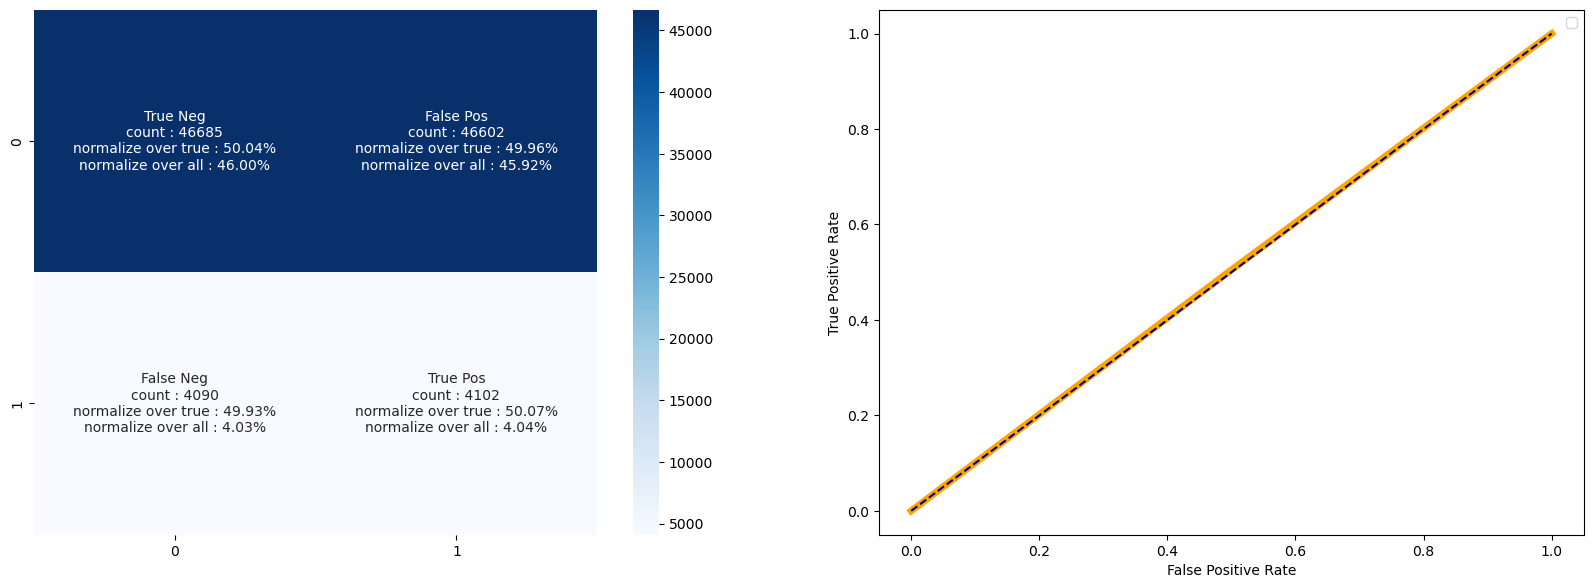



____________________________________________________________________________________________________
____________________________________________________________________________________________________




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




LogisticRegression : 

	execution time : 4.53

	best_score_ : 0.805

	roc_auc_score : 0.563

	beta_score beta=5 : 0.172

	beta_score beta=0.25 : 0.554

	recall_score : 0.167

	precision_score : 0.648


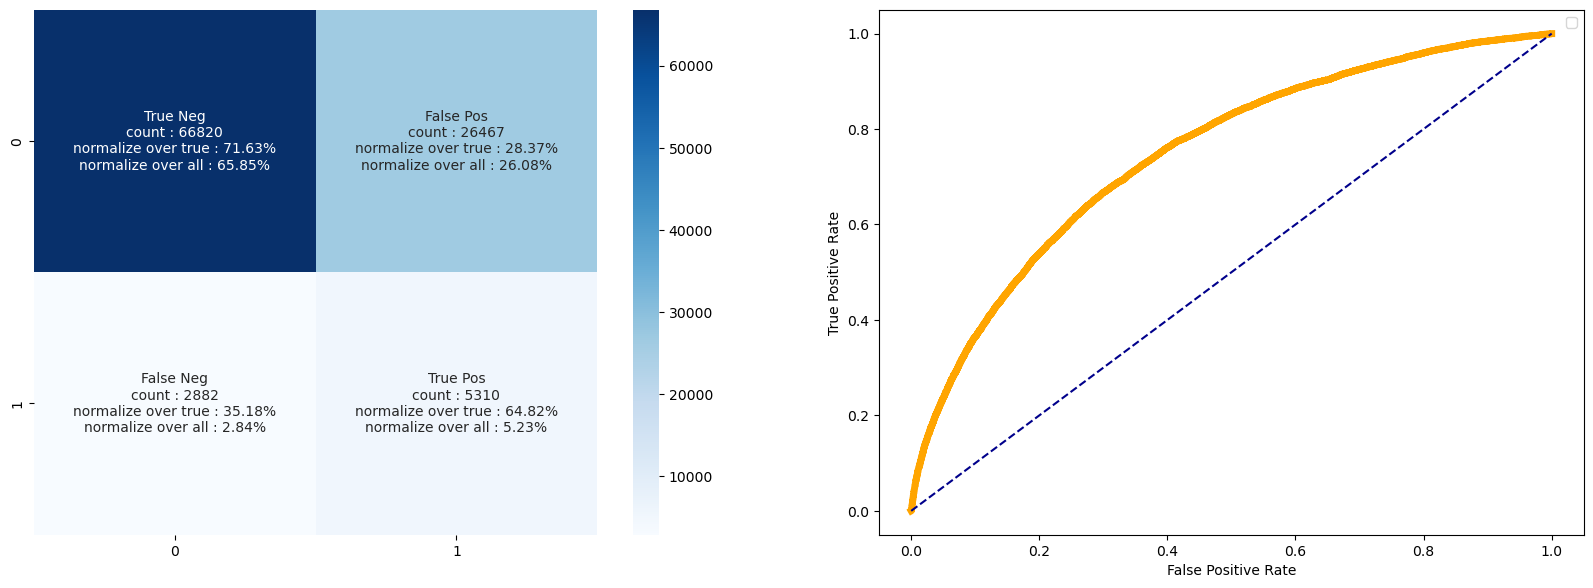



____________________________________________________________________________________________________
____________________________________________________________________________________________________




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




RandomForestClassifier : 

	execution time : 80.32

	best_score_ : 0.985

	roc_auc_score : 0.608

	beta_score beta=5 : 0.183

	beta_score beta=0.25 : 0.018

	recall_score : 0.296

	precision_score : 0.017


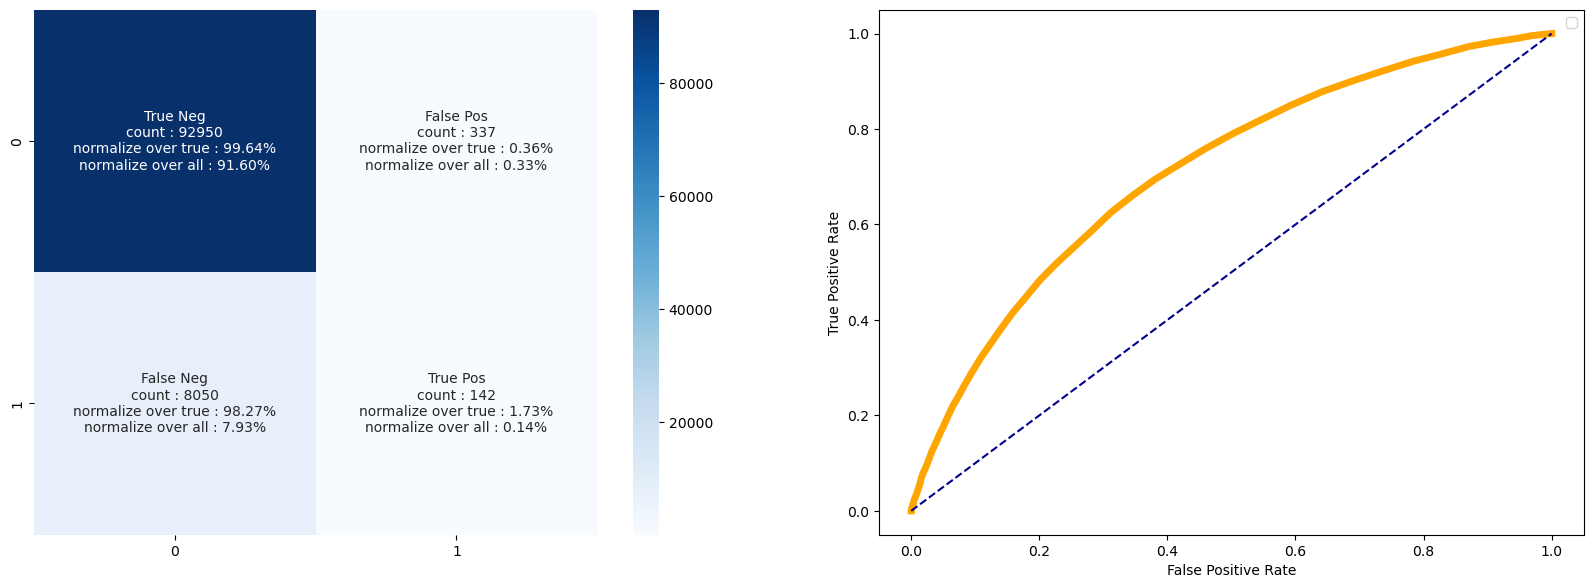



____________________________________________________________________________________________________
____________________________________________________________________________________________________




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




LGBMClassifier : 

	execution time : 9.68

	best_score_ : 0.969

	roc_auc_score : 0.735

	beta_score beta=5 : 0.356

	beta_score beta=0.25 : 0.039

	recall_score : 0.548

	precision_score : 0.036


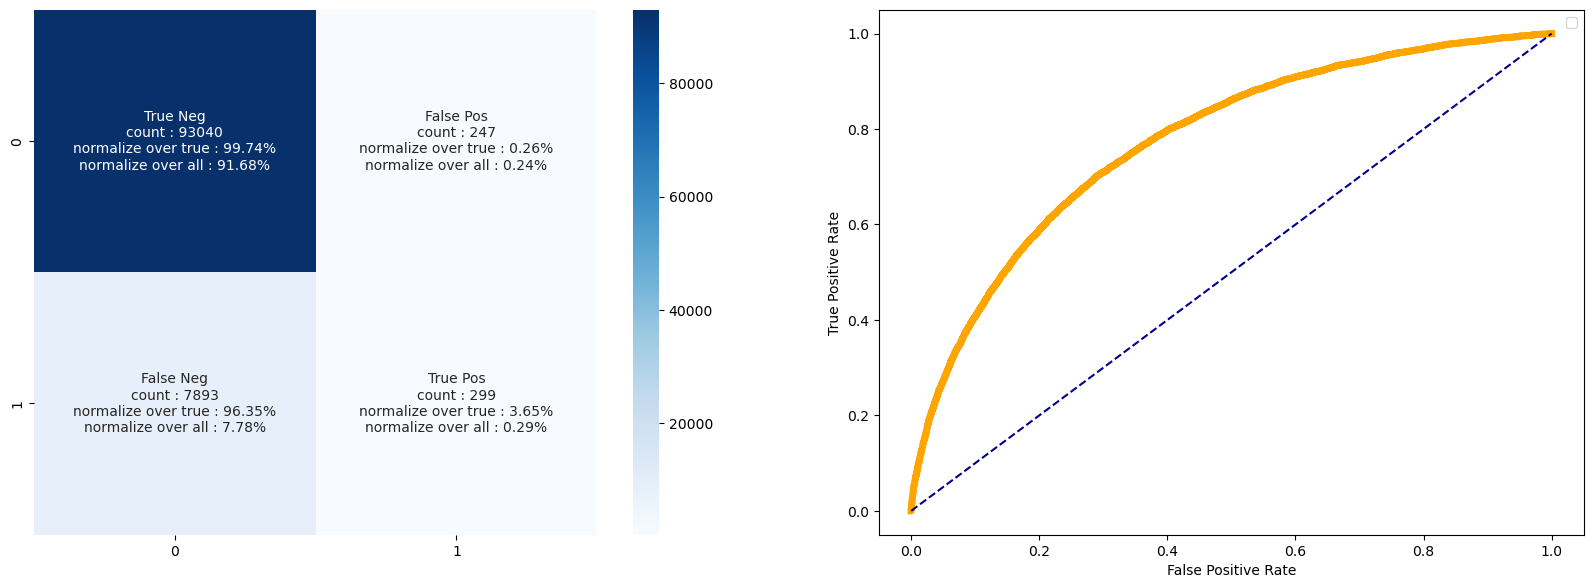



____________________________________________________________________________________________________
____________________________________________________________________________________________________




In [10]:
model_dict ={}
model_dict["DummyClassifier"] = create_or_read_model(create=False, 
                                    version=1, 
                                    score='roc_auc',
                                    cv=5, 
                                    reg_model_name="DummyClassifier", 
                                    Estimator="DummyClassifier()", 
                                    param_grid={'strategy' : ['stratified', 'uniform']})

model_dict["LogisticRegression"] = create_or_read_model(create=False, 
                                    version=1, 
                                    score='roc_auc',
                                    cv=5, 
                                    reg_model_name="LogisticRegression", 
                                    Estimator="LogisticRegression()", 
                                    param_grid = {'penalty' : ['l2'],
                                                  'max_iter' : [1000]}
                                    )
model_dict["RandomForestClassifier"] = create_or_read_model(create=False, 
                                    version=1, 
                                    score='roc_auc',
                                    cv=5, 
                                    reg_model_name="RandomForestClassifier", 
                                    Estimator="RandomForestClassifier()", 
                                    param_grid = {'criterion' : ['gini', 'entropy'],
                                                  'max_depth' : [200]}
                                    )
model_dict["LGBMClassifier"] = create_or_read_model(create=False, 
                                    version=1, 
                                    score='roc_auc',
                                    cv=5, 
                                    reg_model_name="LGBMClassifier", 
                                    Estimator="LGBMClassifier()", 
                                    param_grid = {'n_estimators' : [1000],
                                      'learning_rate' : [0.02],
                                      'max_depth' : [8]}
                                    )

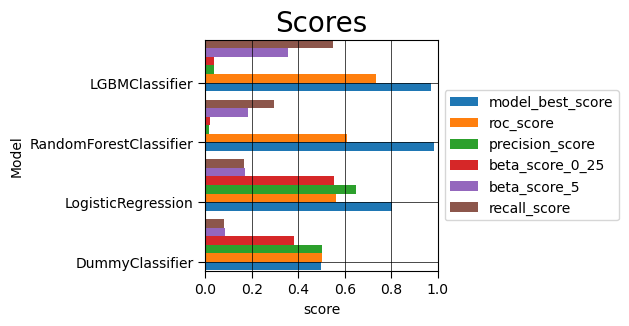

In [11]:
plt_scores(model_dict, 
           keys_to_plot=['model_best_score',
                         'roc_score',
                         'precision_score',
                         'beta_score_0_25',
                         'beta_score_5',
                         'recall_score'],
           title='Scores',
           x_lim=[0,1])

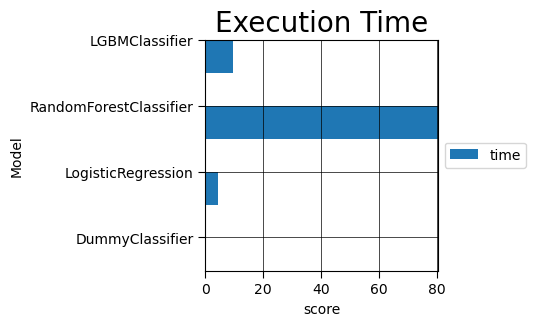

In [12]:
plt_scores(model_dict, 
           keys_to_plot=['time'],
           title='Execution Time')

### 2.5 LightGBM with HyperOPT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


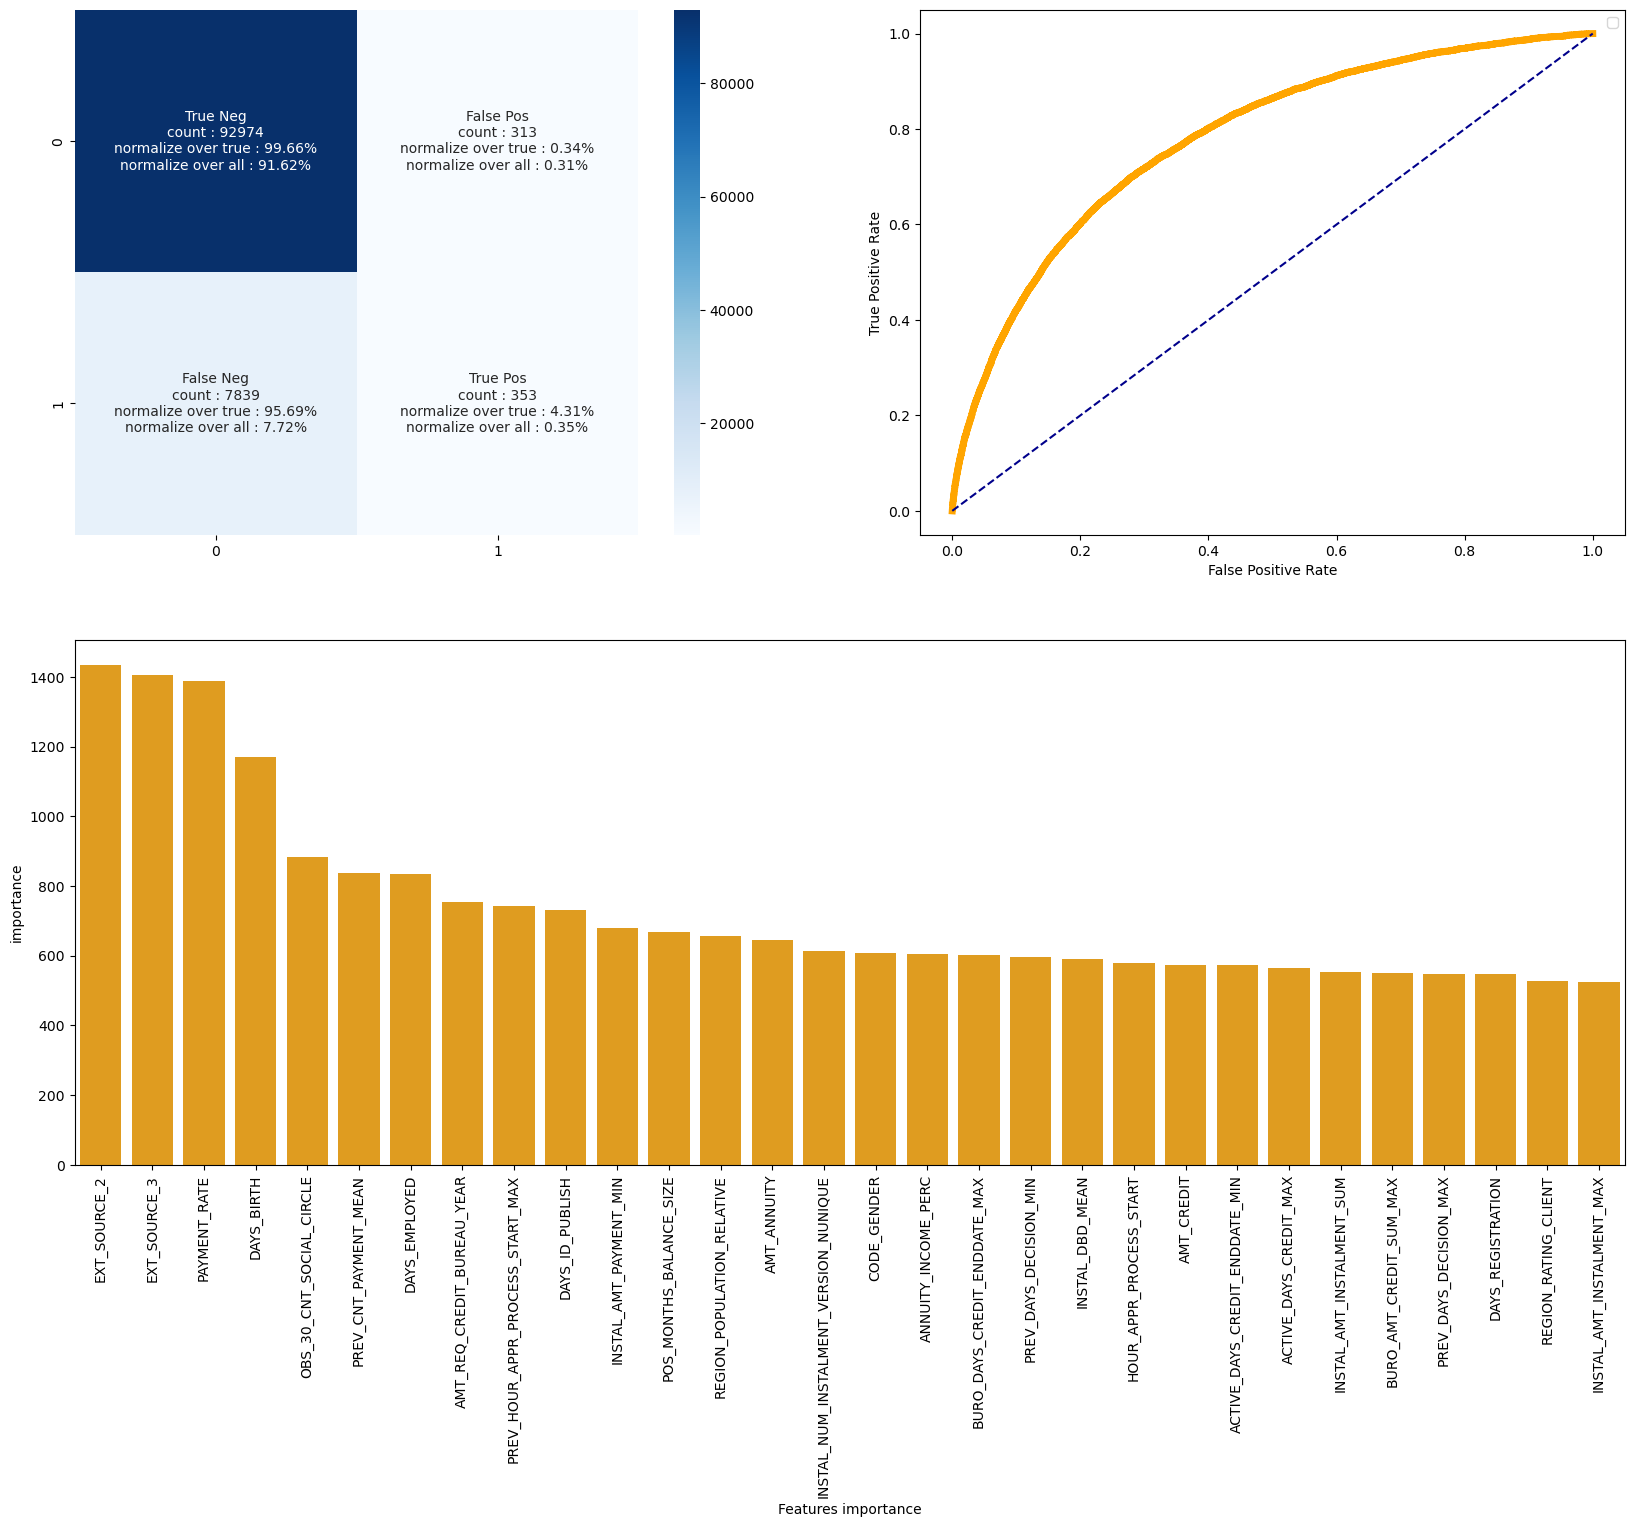

In [13]:
device = 'gpu'
n_estimators = 2000
max_depth=30
n_KFolds = 3
max_evals = 10


def objective(params):
    params = {
        'reg_alpha' : int(params['reg_alpha']),
        'min_child_weight' : int(params['min_child_weight']),
        'learning_rate': params['learning_rate'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_lambda': params['reg_lambda'],
        'device' : device,
        'n_estimators': n_estimators,
        'max_depth':max_depth
        }
    model= LGBMClassifier(**params)
    cv = StratifiedKFold(n_KFolds)
    y_pred = cross_val_predict(model, X_train, y_train, method='predict', cv=cv)
    beta_score = fbeta_score(y_train, y_pred, beta=50)
#     specificity= specificity_score(y_pred,y_train)
    return {'loss': (1 - beta_score), 'status': STATUS_OK }

def LGBM_hyperopt(run_name, create, version=1):
    if create ==True:
        space = {
            'learning_rate': hp.uniform('learning_rate', 0.001, 0.03),
            'reg_alpha' : hp.quniform('reg_alpha', 40,180,5),
            'colsample_bytree': hp.uniform('colsample_bytree', 0.60, 0.95),
            'reg_lambda': hp.uniform('reg_lambda', 1, 20),
            'min_child_weight' : hp.quniform('min_child_weight', 5, 10, 1),
            }
        trials = Trials()
        best = fmin(fn=objective, space=space, max_evals=max_evals, algo=tpe.suggest)
        with mlflow.start_run(run_name=run_name) as run:
            lgbm = LGBMClassifier(
                max_depth= max_depth,
                reg_alpha=int(best['reg_alpha']),
                min_child_weight=int(best['min_child_weight']),
                learning_rate= best['learning_rate'],
                colsample_bytree= best['colsample_bytree'],
                reg_lambda= best['reg_lambda'],
                n_estimators=n_estimators,
                device=device
                )
            lgbm.fit(X_train, y_train)
            mlflow.log_params(best)
            mlflow.sklearn.log_model(sk_model = lgbm,
                                        artifact_path="classifier",
                                        registered_model_name=run_name)
        model = lgbm
    else:
        model_uri=f"models:/{run_name}/{version}"
        model=mlflow.sklearn.load_model(model_uri)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    feature_importance_df = pd.DataFrame()
    feature_importance_df['feature'] = features
    feature_importance_df['importance'] = model.feature_importances_
    feature_importance_df['importance_abs']= abs(feature_importance_df['importance'])
    feature_importance_df = feature_importance_df.sort_values('importance_abs', ascending=False)  
    cf_matrix_roc_auc(model, y_test, y_pred, y_pred_proba[:,1], features_importance_df=feature_importance_df)
    return
LGBM_hyperopt(run_name='LGBM_Hyperopt_fscore', create=False, version=2)

### 2.6 X_test_sample / SHAP / feature importance

In [14]:
def X_sample(create=False):
    if create:
        X_test_sample = X_test.sample(300)
        X_test_sample.to_csv('./output_datasets/X_test_sample.csv')
        X_test_sample.to_csv(r"C:\Users\emanu\Documents\FastAPI\X_test_sample.csv")
        X_test_sample.to_csv(r"C:\Users\emanu\Documents\Dash_app\X_test_sample.csv")
    X_test_sample = pd.read_csv('./output_datasets/X_test_sample.csv',index_col='SK_ID_CURR')
    return X_test_sample

def shap_model_feat_importance(X_test_sample, create=False, model_uri="models:/LGBM_Hyperopt_specificity/1" ):
    # LOAD MODEL
    model = mlflow.sklearn.load_model(model_uri)
    if create:
        # shap
        with mlflow.start_run() as run:
            mlflow.shap.log_explanation(model.predict, X_test_sample)
        client = MlflowClient()
        artifact_path = "model_explanations_shap"
        artifacts = [x.path for x in client.list_artifacts(run.info.run_id, artifact_path)]
        dst_path = client.download_artifacts(run.info.run_id, artifact_path)
        base_values = np.load(os.path.join(dst_path, "base_values.npy"))
        shap_values = np.load(os.path.join(dst_path, "shap_values.npy"))
        
        # predict
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba = list(zip(*y_pred_proba))
        prediction_proba_0 = np.array(y_pred_proba[0])*100
        
        feature_importance_df = pd.DataFrame()
        feature_importance_df['feature'] = features
        feature_importance_df['importance'] = model.feature_importances_
        feature_importance_df['importance_abs']= abs(feature_importance_df['importance'])
        feature_importance_df = feature_importance_df.sort_values('importance_abs', ascending=False)
        
        df_sample = df.loc[:,feature_importance_df.head(50)['feature']]
        
        # save results on Projet_7 folder
        np.save("./output_datasets/model_explanations_shap/base_values.npy",base_values)
        np.save("./output_datasets/model_explanations_shap/shap_values.npy",shap_values)
        np.save("./output_datasets/all_prediction.npy",prediction_proba_0)
        feature_importance_df.to_csv("./output_datasets/feature_importance_df.csv", index=False)
        # save results on FastAPI folder
        np.save(r"C:\Users\emanu\Documents\FastAPI\model_explanations_shap\base_values.npy",base_values)
        np.save(r"C:\Users\emanu\Documents\FastAPI\model_explanations_shap\shap_values.npy",shap_values)
        feature_importance_df.to_csv(r"C:\Users\emanu\Documents\FastAPI\feature_importance_df.csv", index=False)
        # save results on Dash_app folder
        np.save(r"C:\Users\emanu\Documents\Dash_app\model_explanations_shap\base_values.npy",base_values)
        np.save(r"C:\Users\emanu\Documents\Dash_app\model_explanations_shap\shap_values.npy",shap_values)
        np.save(r"C:\Users\emanu\Documents\Dash_app\all_proba.npy",prediction_proba_0)
        df_sample.to_csv(r"C:\Users\emanu\Documents\Dash_app\DataFrame.csv", index=False)
        feature_importance_df.to_csv(r"C:\Users\emanu\Documents\Dash_app\feature_importance_df.csv", index=False)
        
    # read
    base_values = np.load("./output_datasets/model_explanations_shap/base_values.npy")
    shap_values = np.load("./output_datasets/model_explanations_shap/shap_values.npy")
    feature_importance_df = pd.read_csv('./output_datasets/feature_importance_df.csv',index_col='feature')

    return base_values, shap_values, feature_importance_df


# run functions
X_test_sample = X_sample(create=False)
base_values, shap_values, feature_importance_df = shap_model_feat_importance(X_test_sample, create=False, model_uri="models:/LGBM_Hyperopt_fscore/2")

# SHOW
print('X_test_sample')
display(X_test_sample.head(5))
print('base_values')
print(base_values)
print('shap_values')
print(shap_values)
print('feature_importance_df')
feature_importance_df.head(5)

X_test_sample


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industry type 1,ORGANIZATION_TYPE_Industry type 10,ORGANIZATION_TYPE_Industry type 11,ORGANIZATION_TYPE_Industry type 12,ORGANIZATION_TYPE_Industry type 13,ORGANIZATION_TYPE_Industry type 2,ORGANIZATION_TYPE_Industry type 3,ORGANIZATION_TYPE_Industry type 4,ORGANIZATION_TYPE_Industry type 5,ORGANIZATION_TYPE_Industry type 8,ORGANIZATION_TYPE_Industry type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade type 1,ORGANIZATION_TYPE_Trade type 2,ORGANIZATION_TYPE_Trade type 3,ORGANIZATION_TYPE_Trade type 4,ORGANIZATION_TYPE_Trade type 6,ORGANIZATION_TYPE_Trade type 7,ORGANIZATION_TYPE_Transport type 1,ORGANIZATION_TYPE_Transport type 3,ORGANIZATION_TYPE_Transport type 4,ORGANIZATION_TYPE_Un

base_values
0.4966666666666667
shap_values
[[ 0.02337182 -0.03028911  0.         ... -0.00507554 -0.01273277
  -0.00641302]
 [ 0.          0.          0.01334864 ...  0.03136754  0.
   0.        ]
 [-0.00742436 -0.09022445 -0.0022244  ...  0.0204046  -0.03883076
   0.00385093]
 ...
 [ 0.04093511  0.          0.         ...  0.0266452  -0.00542646
   0.00455776]
 [ 0.          0.          0.         ...  0.03140038  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
feature_importance_df


,importance,importance_abs
feature,,
EXT_SOURCE_2,1435,1435
EXT_SOURCE_3,1406,1406
PAYMENT_RATE,1388,1388
DAYS_BIRTH,1170,1170
OBS_30_CNT_SOCIAL_CIRCLE,884,884


# 3. DataDrift

https://github.com/evidentlyai/evidently

In [ ]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

In [20]:
model = mlflow.sklearn.load_model("models:/LGBM_Hyperopt_fscore/2")

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy['target'] = y_train
X_test_copy['target']=model.predict(X_test)

In [ ]:
X_train_copy = X_train_copy.sample(300)
X_test_copy = X_test_copy.sample(300)

In [ ]:
data_drift_report = Report(metrics=[DataDriftPreset()])
data_drift_report.run(reference_data=X_train_copy, current_data=X_test_copy, column_mapping=None)
data_drift_report

In [ ]:
data_drift_report.save_html("./data_drift_check-dashboard.html")

In [39]:
data_drift_report.json()

In [13]:
toc=time.time()
print(f"Prediction execution time : {round((toc-tic)/60,2)} min")

Notebook execution time : 1.24 min
